In [1]:
import numpy as np
import matplotlib.pyplot as plt
from util.plot import plot_cdf,plot_lines,plot_box_by_config,plot_box
from util.consts import balance_size_bins, balance_size_bins_label
from util.plot import color_list
import json
import os
from collections import defaultdict

flowsim-sldn: (1, 85588)
new_loss01_mlp1_10-sldn: (1, 85588)


/data1/lichenni/projects/per-flow-sim/util/plot.py:110: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(
/data1/lichenni/projects/per-flow-sim/util/plot.py:110: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(
/data1/lichenni/projects/per-flow-sim/util/plot.py:110: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(


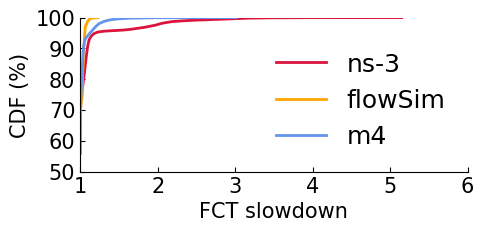

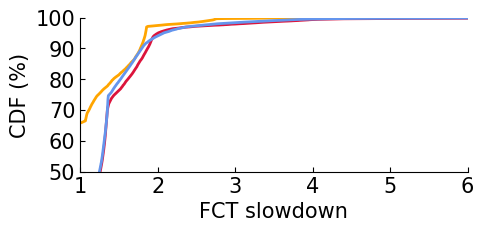

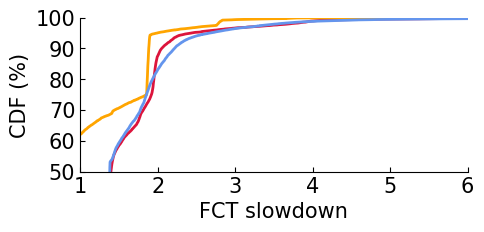

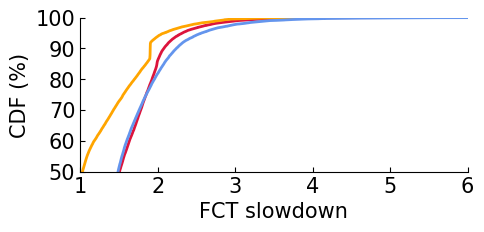

In [9]:
size_bins = [0, 1 * 1024, 200 * 1024, 1024 * 1024, np.inf]  # Sizes in bytes
size_bin_labels = ['<=1KB', '1KB-200KB','200KB-1MB', '1MB']
legend_list=['ns-3','flowSim','m4']
model_instance_list=['flowsim',"new_loss01_mlp1_10"]
n_methods = len(legend_list)
fig_index=0
for scenario_idx in [0]:
    empirical_str = f"_large{scenario_idx}"
    
    fid=np.load(f'/data1/lichenni/projects/per-flow-sim/parsimon-eval/expts/fig_7/data/{scenario_idx}/ns3/fid_topology_flows.npy')
    sizes=np.load(f'/data1/lichenni/projects/per-flow-sim/parsimon-eval/expts/fig_7/data/{scenario_idx}/ns3/fsize.npy')[fid]

    error_list=[]
    error_size_list=[]
    for model_idx,model_instance in enumerate(model_instance_list):
        data_m4 = np.load(f'./res/{model_instance}{empirical_str}.npz')
        sldn = data_m4['sldn']
        predicted_sldns = sldn[:, :len(sizes), 0]
        actual_sldns = sldn[:,:len(sizes), 1]
        print(f"{model_instance}-sldn: {predicted_sldns.shape}")
        
        # predicted_sldns[predicted_sldns<1]=1
        # actual_sldns[actual_sldns<1]=1
        if model_idx==0:
            error_list.extend([actual_sldns,predicted_sldns])
            error_size_list.extend([sizes,sizes])
        else:
            error_list.append(predicted_sldns)
            error_size_list.append(sizes)

    # Initialize a dictionary to store errors per size bucket for each model instance
    error_bins = {legend: {label: np.array([]) for label in size_bin_labels} for legend in legend_list}

    # Process the data for each model instance
    for mi in range(n_methods):
        legend = legend_list[mi]
        errors = error_list[mi]  # Shape: (n_scenarios, n_flows)
        sizes = error_size_list[mi]  # Shape: (n_scenarios, n_flows)

        # Flatten the arrays
        errors_flat = errors.flatten()
        sizes_flat = sizes.flatten()

        # Assign flows to size buckets
        size_indices = np.digitize(sizes_flat, size_bins)

        # Collect errors for each size bucket
        for b in range(1, len(size_bins)):
            bin_mask = size_indices == b
            bin_errors = errors_flat[bin_mask]
            error_bins[legend][size_bin_labels[b - 1]] = np.concatenate((error_bins[legend][size_bin_labels[b - 1]], bin_errors))

    # Plot the CDF of errors for each size bucket
    for idx, size_bin_label in enumerate(size_bin_labels):
        plot_data=[]
        for mi, legend in enumerate(legend_list):
            bin_errors = error_bins[legend][size_bin_label]
            plot_data.append(bin_errors)
        plot_cdf(plot_data,f'./figs/eva_large_scale_cdf_{idx}.pdf',legend_list if idx==0 else [],'FCT slowdown',legend_font=18,group_size=3,loc=4,rotate_xaxis=False,ylim_low=50,log_switch=False,xlim_bottom=1, fig_idx=fig_index,xlim=6)
        fig_index+=1

-----------------
flowsim_large0-sldn: (85588,)
p99 slowdown: 2.63869074761659, 3.325010334041024
new_loss01_mlp1_10_large0-sldn: (85588,)
p99 slowdown: 3.307126727104194, 3.325010334041024
mean error:[13.66592765042259, 4.819822301124581]
p99 error: [20.64112642  0.53785117]


/data1/lichenni/projects/per-flow-sim/util/plot.py:219: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(
/data1/lichenni/projects/per-flow-sim/util/plot.py:219: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(


-----------------
flowsim_large1-sldn: (50788,)
p99 slowdown: 1.9803868636720396, 2.3886448469420163
new_loss01_mlp1_10_large1-sldn: (50788,)
p99 slowdown: 2.3401413774490347, 2.3886448469420163
mean error:[13.669938981268052, 3.207276962049891]
p99 error: [17.0916151   2.03058523]
-----------------
flowsim_large2-sldn: (92281,)
p99 slowdown: 2.435299607892364, 3.2627295299072308
new_loss01_mlp1_10_large2-sldn: (92281,)
p99 slowdown: 2.785667896270749, 3.2627295299072308
mean error:[8.835963526992032, 4.297547881371834]
p99 error: [25.36005251 14.62155012]


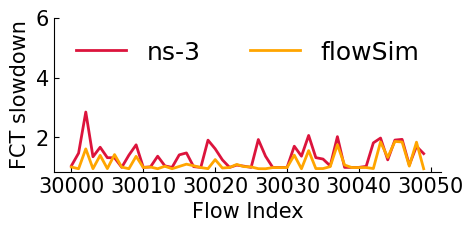

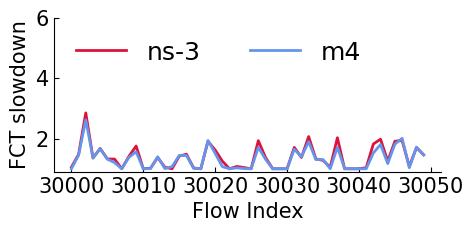

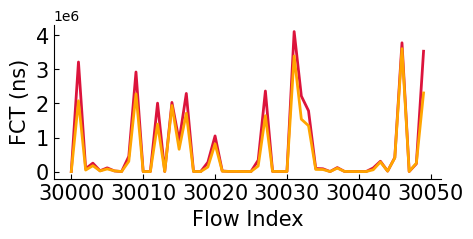

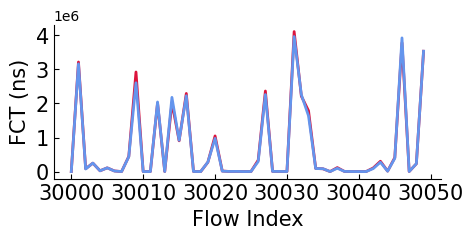

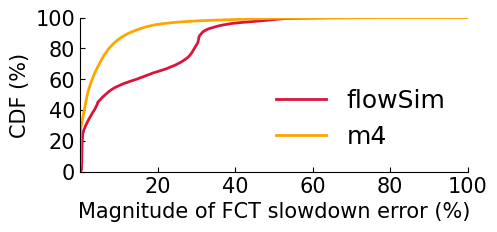

In [10]:
empirical_str = ""

legend_list=['flowSim','m4']

for scenario_idx,scenario_str in enumerate(["_large0","_large1","_large2"]):
# for scenario_idx,scenario_str in enumerate(["_large1"]):
    model_instance_list=[f'flowsim{scenario_str}',f'new_loss01_mlp1_10{scenario_str}']
    # model_instance_list=[f'flowsim{scenario_str}_debug',f"final_10{scenario_str}"]
    # model_instance_list=[f'flowsim{scenario_str}',f'flowsim{scenario_str}_debug']
    fid=np.load(f'/data1/lichenni/projects/per-flow-sim/parsimon-eval/expts/fig_7/data/{scenario_idx}/ns3/fid_topology_flows.npy')
    error_list=[]
    error_list_p99=[]
    sldn_list=[]
    fct_list=[]
    print(f"-----------------")
    for model_instance in model_instance_list:
        data_m4 = np.load(f'./res/{model_instance}{empirical_str}.npz')
        sldn = data_m4['sldn']
        predicted_sldns = sldn[:, :len(fid), 0].squeeze()
        actual_sldns = sldn[:,:len(fid), 1].squeeze()
        print(f"{model_instance}-sldn: {predicted_sldns.shape}")
        
        fct=data_m4['fct']
        predicted_fcts = fct[:, :, 0].squeeze()
        actual_fcts = fct[:,:, 1].squeeze()
        
        # predicted_sldns[predicted_sldns==0]=1
        # actual_sldns[actual_sldns==0]=1
        # calculate the relative error
        relative_error_sldn = np.abs(actual_sldns - predicted_sldns) / actual_sldns *100
        sldn_list.append([actual_sldns,predicted_sldns])
        fct_list.append([actual_fcts,predicted_fcts])
        error_list.append(relative_error_sldn)
        
        sldn_p99_est=np.percentile(predicted_sldns,99)
        sldn_p99_act=np.percentile(actual_sldns,99)
        print(f"p99 slowdown: {sldn_p99_est}, {sldn_p99_act}")
        error_list_p99.append(np.abs(sldn_p99_est-sldn_p99_act)/sldn_p99_act*100)
    error_list=np.array(error_list)
    error_list_p99=np.array(error_list_p99)
    sldn_list=np.array(sldn_list)
    fct_list=np.array(fct_list)
    print(f"mean error:{[np.mean(x) for x in error_list]}")
    print(f"p99 error: {error_list_p99}")
    
    if scenario_idx==0:  
        fig_idx=0
        data_x=np.arange(30000, 30050)
        linelabels = [["ns-3","flowSim"],["ns-3","m4"]]
        format_idx=[[0,1],[0,2]]
        for i, (actual, predicted) in enumerate(sldn_list):
            plot_data=[(data_x,actual[data_x]),(data_x,predicted[data_x])]
            plot_lines(
                plot_data,
                f'./figs/eva_large_scale_line_sldn_{i}.pdf',
                linelabels[i],
                x_label="Flow Index",
                y_label="FCT slowdown",
                title=None,
                ylim=6,
                format_idx=format_idx[i],
                legend_cols=2,
                legend_font=18,
                fig_idx=fig_idx,
            )
            fig_idx+=1

        for i, (actual, predicted) in enumerate(fct_list):
            plot_data=[(data_x,actual[data_x]),(data_x,predicted[data_x])]
            plot_lines(
                plot_data,
                f'./figs/eva_large_scale_line_fct_{i}.pdf',
                [],
                x_label="Flow Index",
                y_label="FCT (ns)",
                title=None,
                # log_switch=True,
                # ylim=6,
                format_idx=format_idx[i],
                legend_cols=2,
                legend_font=18,
                fig_idx=fig_idx,
            )
            fig_idx+=1
            
        plot_cdf(
            error_list,
            f'./figs/eva_large_scale_cdf.pdf',
            legend_list,
            x_label="Magnitude of FCT slowdown error (%)",
            log_switch=False,
            rotate_xaxis=False,
            xlim=100,
            xlim_bottom=0.01,
            fontsize=15,
            legend_font=18,
            loc=4,
            enable_abs=True,
            group_size=5,
            fig_idx=fig_idx
        )

flowsim-sldn: (100, 20000)
new_loss01_mlp1_10-sldn: (100, 20000)
worst idx: [64 65 49 41 26 63 57 17 68 52]
p99 error:[29.470826324191712, 23.076251964309673]
mean error:[13.508511277029257, 7.789664371708763]
median error:[11.33384600925967, 6.686010926423702]
p99 error:[29.234773649699395, 9.734088306350715]


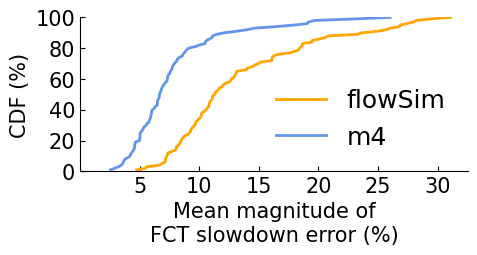

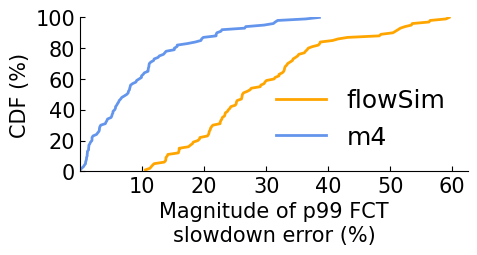

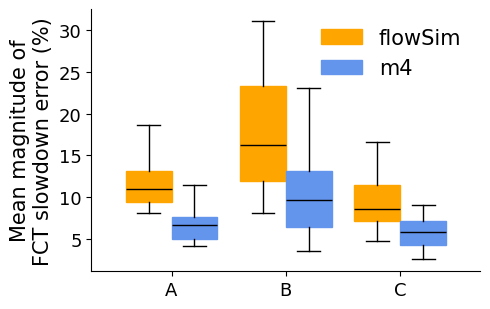

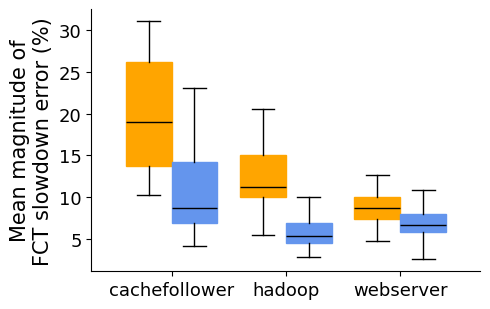

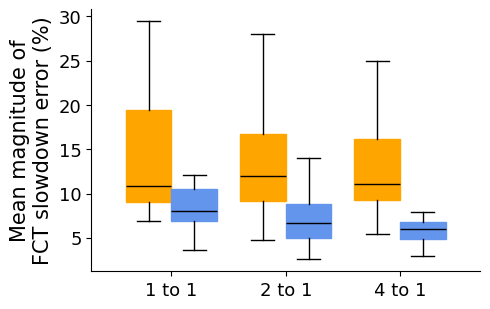

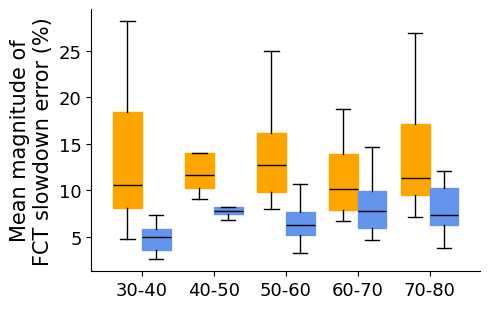

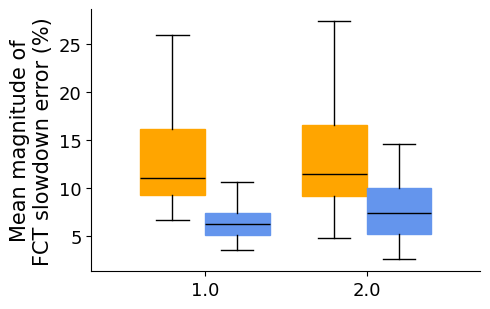

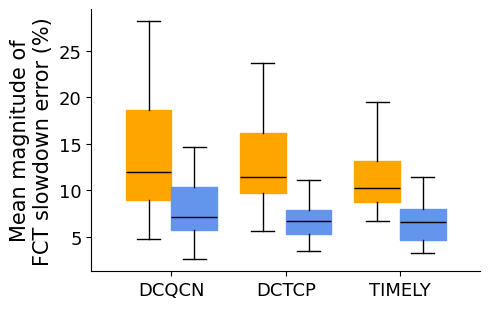

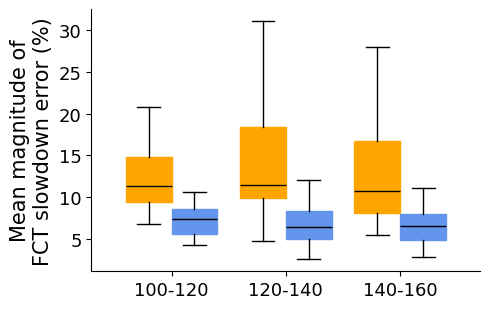

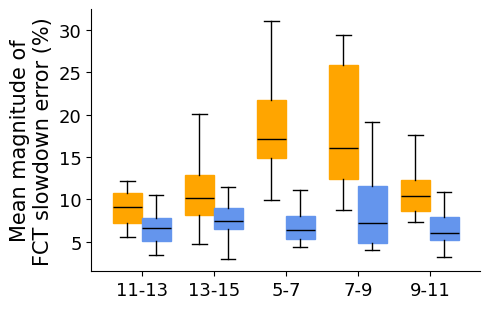

In [25]:
n_scenario=100
empirical_str = "eval_test"
# legend_list=['flowSim','m4','m4-ori','m4-loss01']
# model_instance_list=['flowsim','new_11','new_ori_11','new_loss01_mlp1_10']
legend_list=['flowSim','m4']
model_instance_list=['flowsim','new_loss01_mlp1_10']
                     
n_methods = len(legend_list)
config_file=f'/data1/lichenni/projects/per-flow-sim/parsimon-eval/expts/fig_8/spec/eval_test.mix.json'
configs=json.load(open(config_file))

index_list_ori=[]
for i in range(n_scenario):
    if os.path.exists(f'/data1/lichenni/projects/per-flow-sim/parsimon-eval/expts/fig_8/{empirical_str}/{i}/ns3/flowsim_fct.npy'):
        index_list_ori.append(i)
index_list=[]
config_list=[]
for idx,i in enumerate(index_list_ori):
    config=configs[i]
    spatial=config['spatial'].split('/')[-1].split('.')[0].split('_')[1].upper()
    size_dist=config['size_dist'].split('/')[-1].split('.')[0].split('-')[0]
    cluster=config['cluster'].split('/')[-1].split('.')[0].split('_')
    cluster=f"{cluster[1]} to {cluster[3]}"
    max_load=float(config['max_load'])
    lognorm_sigma=float(config['lognorm_sigma'])
    cc=config['cc'].upper()
    bfsz=float(config['bfsz'])
    fwin=float(config['window'])
    
    config_list.append([spatial, size_dist, cluster, max_load, lognorm_sigma,cc,bfsz,fwin])
    # if spatial!="cluster_c_4_16":
    # if size_dist!='hadoop-all':
    # if cc=='DCQCN':
    # if fwin<12000:
    # if bfsz>16:
    index_list.append(idx)
config_list=np.array(config_list)

error_list=[]
error_list_p99=[]
for model_instance in model_instance_list:
    data_m4 = np.load(f'./res/{model_instance}{empirical_str}.npz')
    sldn = data_m4['fct']
    predicted_sldns = sldn[index_list, :, 0]
    actual_sldns = sldn[index_list,:, 1]
    print(f"{model_instance}-sldn: {predicted_sldns.shape}")
    
    predicted_sldns[predicted_sldns==0]=1
    actual_sldns[actual_sldns==0]=1
    # calculate the relative error
    relative_error_sldn = np.mean(np.abs(actual_sldns - predicted_sldns) / actual_sldns *100, axis=1)
    # relative_error_sldn = np.abs(actual_sldns - predicted_sldns) / actual_sldns *100
    sldn_p99_est=np.percentile(predicted_sldns,99,axis=1)
    sldn_p99_act=np.percentile(actual_sldns,99,axis=1)
    
    error_list.append(relative_error_sldn)
    error_list_p99.append(np.abs(sldn_p99_est-sldn_p99_act)/sldn_p99_act*100)
config_list=config_list[index_list]
error_list=np.array(error_list)
error_list_p99=np.array(error_list_p99)

sorted_index=np.argsort(error_list[0])
print(f"worst idx: {sorted_index[-10:]}")
# print(f"worst perf: {error_list[2][sorted_index[-10:]]}, {error_list[1][sorted_index[-10:]]}")

print(f"p99 error:{[np.percentile(x,99) for x in error_list]}")
print(f"mean error:{[np.mean(x) for x in error_list]}")
print(f"median error:{[np.median(x) for x in error_list]}")
print(f"p99 error:{[np.mean(x) for x in error_list_p99]}")

fig_idx=0
plot_cdf(
    error_list,
    f"./figs/eva_cdf_mean.pdf",
    legend_list,
    x_label="Mean magnitude of\nFCT slowdown error (%)",
    log_switch=False,
    rotate_xaxis=False,
    # ylim_low=90,
    # xlim=150,
    xlim_bottom=0.01,
    fontsize=15,
    legend_font=18,
    loc=4,
    enable_abs=True,
    group_size=5,
    colors=["orange",
    "cornflowerblue"],
    fig_idx=fig_idx,
)
fig_idx+=1

plot_cdf(
    error_list_p99,
    f"./figs/eva_cdf_p99.pdf",
    legend_list,
    x_label="Magnitude of p99 FCT\nslowdown error (%)",
    log_switch=False,
    rotate_xaxis=False,
    # ylim_low=90,
    # xlim=150,
    xlim_bottom=0.01,
    fontsize=15,
    legend_font=18,
    loc=4,
    enable_abs=True,
    group_size=5,
    colors=["orange",
    "cornflowerblue"],
    fig_idx=fig_idx,
)
fig_idx+=1

# Discretize the max_load values
max_load_values = np.array([config[3] for config in config_list], dtype=float)
bins = [0.3,0.4, 0.5, 0.6, 0.70,0.80]
labels = ['30-40', '40-50', '50-60', '60-70','70-80']
max_load_bins = np.digitize(max_load_values, bins, right=False) - 1
max_load_labels = [labels[i] for i in max_load_bins]
for idx, config in enumerate(config_list):
    config[3] = max_load_labels[idx]
    
bfsz_values = np.array([config[6] for config in config_list], dtype=float)
bfsz_values=bfsz_values*10
bins = [100,120,140,160,180]
labels = ['100-120', '120-140', '140-160', '160-180']
bfsz_bins = np.digitize(bfsz_values, bins, right=False) - 1
bfz_labels = [labels[i] for i in bfsz_bins]
for idx, config in enumerate(config_list):
    config[6] = bfz_labels[idx]

fwin_values=np.array([config[7] for config in config_list], dtype=float)
bins = [5000,7000,9000,11000,13000,15000]
labels = ['5-7', '7-9', '9-11', '11-13', '13-15']
fwin_bins = np.digitize(fwin_values, bins, right=False) - 1
fwin_labels = [labels[i] for i in fwin_bins]
for idx, config in enumerate(config_list):
    config[7] = fwin_labels[idx]
# Convert config_list to a NumPy array for easier indexing
config_list = np.array(config_list)

# Generate plots for each configuration attribute
config_attributes = ["Traffic matrix", "Flow size distribution", "Oversubscription", "Max load (%)", "Burstiness (log-normal's $\sigma$)", "Congestion control algorithm", "Buffer size (KB)", "Init. window size (KB)"]
error_list=error_list.T
for i, config_name in enumerate(config_attributes):
    plot_box_by_config(error_list, legend_list if i==0 else None,n_methods=len(legend_list),config_list=config_list, config_index=i, config_name=config_name,fig_idx=fig_idx,loc=1,file_name=f"figs/eva_box_{i}.pdf",y_label="Mean magnitude of\nFCT slowdown error (%)")
    fig_idx+=1

flowsim-sldn: (100, 20000)
new_loss01_mlp1_10-sldn: (100, 20000)
new_loss01_mlp1_nosize_9-sldn: (100, 20000)
new_loss01_mlp1_noqueue_9-sldn: (100, 20000)
new_loss01_mlp1_noflowsim_10-sldn: (100, 20000)
p99 error:[29.470826324191712, 23.076251964309673, 23.169651499755208, 22.31072263523939, 21.6841138006006]
mean error:[13.508511277029257, 7.789664371708763, 9.311822994545327, 9.15238681177109, 7.979052071053877]
median error:[11.33384600925967, 6.686010926423702, 8.157164292108522, 8.17101827659713, 7.0654928514420305]
p99 error:[29.234773649699395, 9.734088306350715, 14.531261841901692, 15.219585030111945, 11.183669818388466]


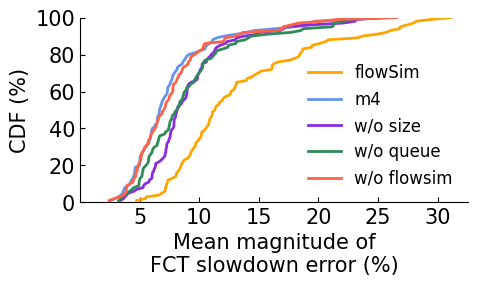

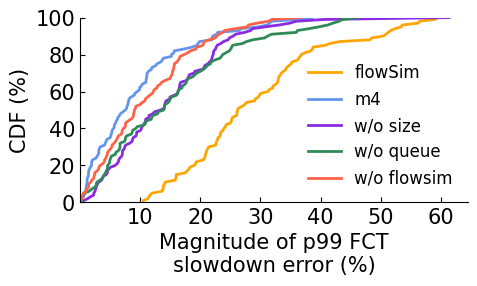

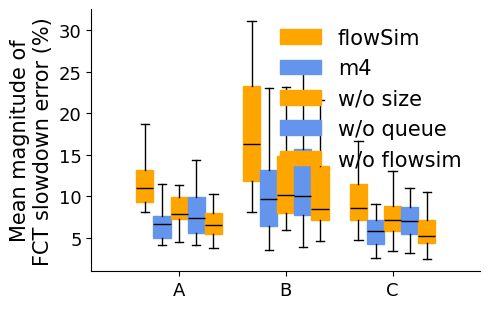

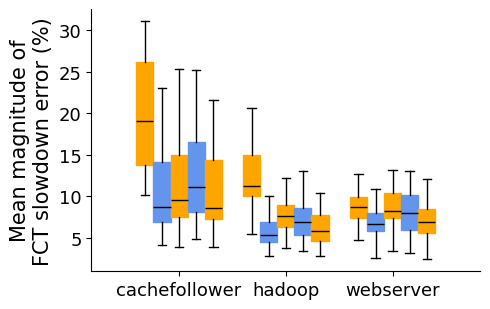

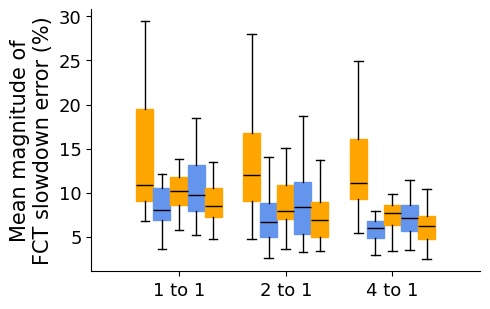

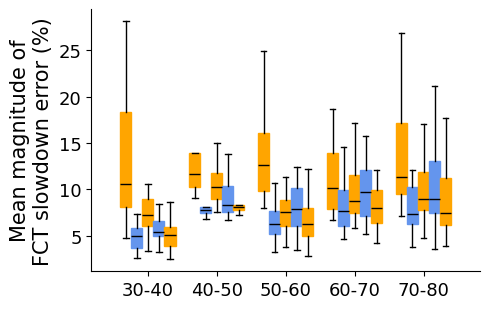

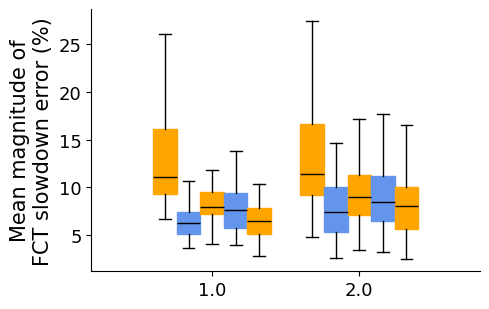

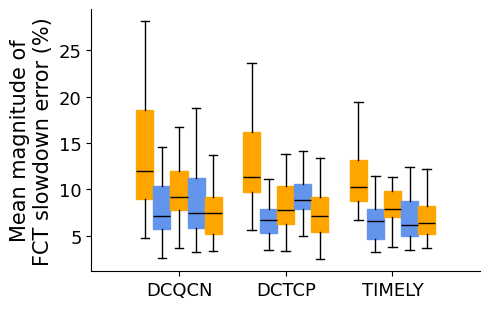

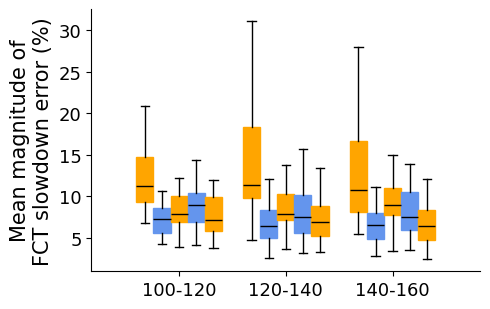

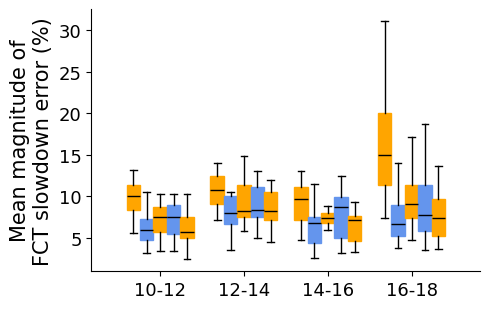

In [24]:
n_scenario=100
empirical_str = "eval_test"
# legend_list=['flowSim','m4','m4_nosupervision','m4_nosize','m4_noqueue']
# model_instance_list=['flowsim','m4_10','final_nosupervision_12','final_nosize_11','final_noqueue_9']
legend_list=['flowSim','m4','w/o size','w/o queue','w/o flowsim']
model_instance_list=['flowsim','new_loss01_mlp1_10','new_loss01_mlp1_nosize_9','new_loss01_mlp1_noqueue_9','new_loss01_mlp1_noflowsim_10']
                     
n_methods = len(legend_list)
config_file=f'/data1/lichenni/projects/per-flow-sim/parsimon-eval/expts/fig_8/spec/eval_test.mix.json'
configs=json.load(open(config_file))

index_list_ori=[]
for i in range(n_scenario):
    if os.path.exists(f'/data1/lichenni/projects/per-flow-sim/parsimon-eval/expts/fig_8/{empirical_str}/{i}/ns3/flowsim_fct.npy'):
        index_list_ori.append(i)
index_list=[]
config_list=[]
for idx,i in enumerate(index_list_ori):
    config=configs[i]
    spatial=config['spatial'].split('/')[-1].split('.')[0].split('_')[1].upper()
    size_dist=config['size_dist'].split('/')[-1].split('.')[0].split('-')[0]
    cluster=config['cluster'].split('/')[-1].split('.')[0].split('_')
    cluster=f"{cluster[1]} to {cluster[3]}"
    max_load=float(config['max_load'])
    lognorm_sigma=float(config['lognorm_sigma'])
    cc=config['cc'].upper()
    bfsz=float(config['bfsz'])
    fwin=float(config['window'])
    
    config_list.append([spatial, size_dist, cluster, max_load, lognorm_sigma,cc,bfsz,fwin])
    index_list.append(idx)
config_list=np.array(config_list)

error_list=[]
error_list_p99=[]
for model_instance in model_instance_list:
    data_m4 = np.load(f'./res/{model_instance}{empirical_str}.npz')
    sldn = data_m4['fct']
    predicted_sldns = sldn[index_list, :, 0]
    actual_sldns = sldn[index_list,:, 1]
    print(f"{model_instance}-sldn: {predicted_sldns.shape}")
    
    predicted_sldns[predicted_sldns==0]=1
    actual_sldns[actual_sldns==0]=1
    # calculate the relative error
    relative_error_sldn = np.mean(np.abs(actual_sldns - predicted_sldns) / actual_sldns *100, axis=1)
    # relative_error_sldn = np.abs(actual_sldns - predicted_sldns) / actual_sldns *100
    sldn_p99_est=np.percentile(predicted_sldns,99,axis=1)
    sldn_p99_act=np.percentile(actual_sldns,99,axis=1)
    
    error_list.append(relative_error_sldn)
    error_list_p99.append(np.abs(sldn_p99_est-sldn_p99_act)/sldn_p99_act*100)
config_list=config_list[index_list]
error_list=np.array(error_list)
error_list_p99=np.array(error_list_p99)

print(f"p99 error:{[np.percentile(x,99) for x in error_list]}")
print(f"mean error:{[np.mean(x) for x in error_list]}")
print(f"median error:{[np.median(x) for x in error_list]}")
print(f"p99 error:{[np.mean(x) for x in error_list_p99]}")

fig_idx=0
plot_cdf(
    error_list,
    f"./figs/eva_ablation_mean.pdf",
    legend_list,
    x_label="Mean magnitude of\nFCT slowdown error (%)",
    log_switch=False,
    rotate_xaxis=False,
    # ylim_low=90,
    # xlim=150,
    xlim_bottom=0.01,
    fontsize=15,
    legend_font=12,
    loc=4,
    enable_abs=True,
    group_size=5,
    colors=["orange",
    "cornflowerblue",
    "blueviolet",
    "seagreen",
    'tomato'],
    fig_idx=fig_idx,
    fig_size=(5,2.4)
)
fig_idx+=1

plot_cdf(
    error_list_p99,
    f"./figs/eva_ablation_p99.pdf",
    legend_list,
    x_label="Magnitude of p99 FCT\nslowdown error (%)",
    log_switch=False,
    rotate_xaxis=False,
    # ylim_low=90,
    # xlim=150,
    xlim_bottom=0.01,
    fontsize=15,
    legend_font=12,
    loc=4,
    enable_abs=True,
    group_size=5,
    colors=["orange",
    "cornflowerblue",
    "blueviolet",
    "seagreen",
    'tomato'],
    fig_idx=fig_idx,
    fig_size=(5,2.4)
)
fig_idx+=1

# Discretize the max_load values
max_load_values = np.array([config[3] for config in config_list], dtype=float)
bins = [0.3, 0.4,0.5, 0.6, 0.7, 0.8]
labels = ['30-40', '40-50', '50-60', '60-70', '70-80']
max_load_bins = np.digitize(max_load_values, bins, right=False) - 1
max_load_labels = [labels[i] for i in max_load_bins]
for idx, config in enumerate(config_list):
    config[3] = max_load_labels[idx]
    
bfsz_values = np.array([config[6] for config in config_list], dtype=float)
bfsz_values=bfsz_values*10
bins = [100,120,140,160,180]
labels = ['100-120', '120-140', '140-160', '160-180']
bfsz_bins = np.digitize(bfsz_values, bins, right=False) - 1
bfz_labels = [labels[i] for i in bfsz_bins]
for idx, config in enumerate(config_list):
    config[6] = bfz_labels[idx]

fwin_values=np.array([config[7] for config in config_list], dtype=float)
bins = [10000,12000,14000,16000,18000]
labels = ['10-12', '12-14', '14-16', '16-18']
fwin_bins = np.digitize(fwin_values, bins, right=False) - 1
fwin_labels = [labels[i] for i in fwin_bins]
for idx, config in enumerate(config_list):
    config[7] = fwin_labels[idx]
# Convert config_list to a NumPy array for easier indexing
config_list = np.array(config_list)

# Generate plots for each configuration attribute
config_attributes = ["Traffic matrix", "Flow size distribution", "Oversubscription", "Max load (%)", "Burstiness (log-normal's $\sigma$)", "Congestion control algorithm", "Buffer size (KB)", "Init. window size (KB)"]
error_list=error_list.T
for i, config_name in enumerate(config_attributes):
    plot_box_by_config(error_list, legend_list if i==0 else None,n_methods=len(legend_list),config_list=config_list, config_index=i, config_name=config_name,fig_idx=fig_idx,loc=1,file_name=None,y_label="Mean magnitude of\nFCT slowdown error (%)")
    fig_idx+=1

res_size_plot: (2, 66)
res_queue_plot: (2, 257)
error_queue_list: (14658,), mean: 0.2096466093600764, median: 0.0
error_size_list: (2227,), mean: 4.031405732037268, median: 2.7872085571289062
size_list: (2227,), max: 73881008.0, min: 1.000046730041504
pkt_list: (14658,), max: 36, min: 0
size_list: max: 73881008.0, min: 1.000046730041504
size_list: max: 36, min: 0


/data1/lichenni/projects/per-flow-sim/util/plot.py:110: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(


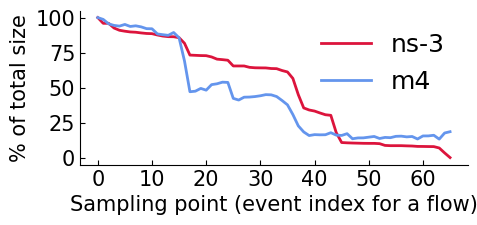

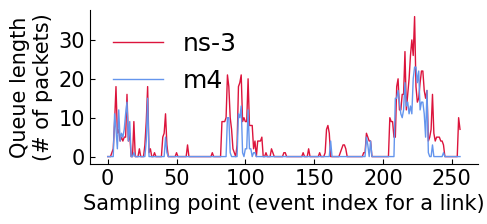

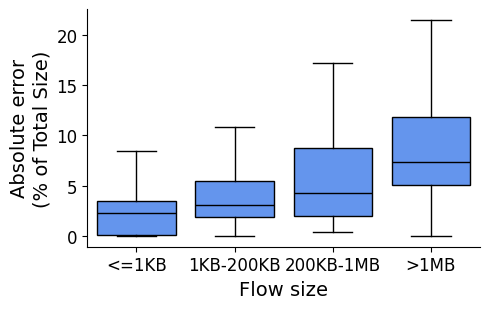

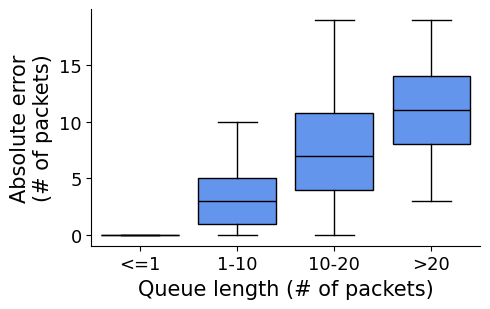

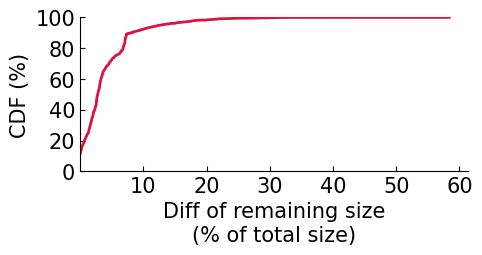

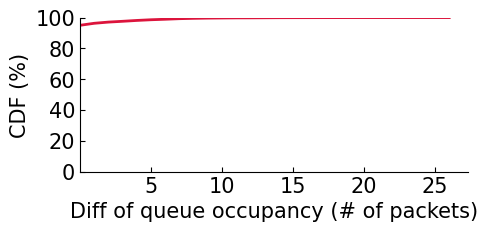

In [33]:
res_dir='/data2/lichenni/output_perflow/new_debug_noflowsim_shard4000_nflows1_nhosts1_nsamples1_lr10Gbps/version_0/test/version_0'

res_size_perflow=[]
res_queue_perlink=[]
error_size_list=[]
size_list=[]
error_queue_list=[]
pkt_list=[]
for scenario_idx in range(100):
    if os.path.exists(f'{res_dir}/{scenario_idx}'):
        
        dir_list=os.listdir(f'{res_dir}/{scenario_idx}')
        for dir_tmp in dir_list:
            res_size_dict=defaultdict(list)
            res_queue_dict=defaultdict(list)
            npz_file=f'{res_dir}/{scenario_idx}/{dir_tmp}/res.npz'
            res=np.load(npz_file)
            res_size=res['res_size'][:2]*100
            res_size[res_size>100]=100
            size_info=(np.exp2(res['size_info'])-1)*1000
            
            res_size_flowidx=res['res_size'][2].astype(int)
            for i in range(res_size.shape[1]):
                res_size_dict[res_size_flowidx[i]].append(res_size[[1,0],i])
            
            for flowidx in res_size_dict:
                tmp=np.array(res_size_dict[flowidx]).T
                error=np.mean(abs(tmp[0]-tmp[1]))
                error_size_list.append(error)
                size_list.append(size_info[flowidx])
            
            res_queue=res['res_queue'][:2]
            res_queue=np.power(res_queue,3).astype(int)
            res_queue_linkidx=res['res_queue'][2]
            for i in range(res_queue.shape[1]):
                res_queue_dict[res_queue_linkidx[i]].append(res_queue[[1,0],i])
            # if np.mean(res_queue[1])>0.5:
            for i in range(res_queue.shape[1]):
                pkt_list.append(res_queue[1,i])
                error_queue_list.append(abs(res_queue[0,i]-res_queue[1,i]))
            res_size_perflow.extend(list(res_size_dict.values()))
            res_queue_perlink.extend(list(res_queue_dict.values()))
            
len_queue=[len(x) for x in res_size_perflow]
sorted_idx=np.argsort(len_queue)
max_idx=sorted_idx[-15]#15,40,70
res_size_plot=np.array(res_size_perflow[max_idx]).T
# res_size_plot[0]=np.sort(res_size_plot[0])[::-1]

len_queue=[len(x) for x in res_queue_perlink]
sorted_idx=np.argsort(len_queue)
max_idx=sorted_idx[-1]
res_queue_plot=np.array(res_queue_perlink[max_idx]).T\

print(f"res_size_plot: {res_size_plot.shape}")
print(f"res_queue_plot: {res_queue_plot.shape}")

error_queue_list=np.array(error_queue_list)
error_size_list=np.array(error_size_list)

print(f"error_queue_list: {error_queue_list.shape}, mean: {np.mean(error_queue_list)}, median: {np.median(error_queue_list)}")
print(f"error_size_list: {error_size_list.shape}, mean: {np.mean(error_size_list)}, median: {np.median(error_size_list)}")

size_list=np.array(size_list)
pkt_list=np.array(pkt_list)
print(f"size_list: {size_list.shape}, max: {np.max(size_list)}, min: {np.min(size_list)}")
print(f"pkt_list: {pkt_list.shape}, max: {np.max(pkt_list)}, min: {np.min(pkt_list)}")

fig_idx=0
data_x=np.arange(0,res_size_plot.shape[1])
plot_data=[(data_x,res_size_plot[0,data_x]),(data_x,res_size_plot[1,data_x])]
plot_lines(
    plot_data,
    f'./figs/eva_size_example.pdf',
    ['ns-3','m4'],
    x_label="Sampling point (event index for a flow)",
    y_label="% of total size",
    title=None,
    # log_switch=True,
    # ylim=139,
    format_idx=[0,2],
    legend_cols=1,
    legend_font=18,
    fig_idx=fig_idx,
    linewidth=2,
    loc=1
)
fig_idx+=1

data_x=np.arange(0, res_queue_plot.shape[1])
plot_data=[(data_x,res_queue_plot[0,data_x]),(data_x,res_queue_plot[1,data_x])]
plot_lines(
    plot_data,
    f'./figs/eva_queue_example.pdf',
    ['ns-3','m4'],
    x_label="Sampling point (event index for a link)",
    y_label="Queue length\n(# of packets)",
    title=None,
    # log_switch=True,
    # ylim=24,
    format_idx=[0,2],
    legend_cols=1,
    legend_font=18,
    fig_idx=fig_idx,
    linewidth=1,
    # loc=9
)

fig_idx+=1

size_buckets = [0, 1 * 1024, 200 * 1024, 1024 * 1024, np.inf]  # Sizes in bytes
bucket_labels = ['<=1KB', '1KB-200KB','200KB-1MB', '>1MB']
# Sort data
sorted_indx = np.argsort(size_list)
data_x = np.array(size_list)[sorted_indx]
error_y = np.array(error_size_list)[sorted_indx]
print(f"size_list: max: {np.max(data_x)}, min: {np.min(data_x)}")
# Group data into buckets
bucketed_data = {label: [] for label in bucket_labels}
for size, error in zip(data_x, error_y):
    for i in range(len(size_buckets) - 1):
        if size_buckets[i] <= size < size_buckets[i+1]:
            bucketed_data[bucket_labels[i]].append(error)
            break
plot_box(
    bucketed_data,
    bucket_labels,
    [],
    n_methods=1,
    x_label='Flow size',
    y_label="Absolute error\n(% of Total Size)",
    title=None,
    fontsize=14,
    legend_font=15,
    loc=3,
    rotate_xaxis=False,
    file_name=f'./figs/eva_size_error.pdf',
    remove_outliers=True,
    fig_idx=fig_idx,
)
fig_idx+=1


pkt_buckets = [0, 1, 10, 20, np.inf]  # Sizes in bytes
bucket_labels = ['<=1','1-10' ,'10-20', '>20']
# Sort data
sorted_indx = np.argsort(pkt_list)
data_x = np.array(pkt_list)[sorted_indx]
error_y = np.array(error_queue_list)[sorted_indx]
print(f"size_list: max: {np.max(data_x)}, min: {np.min(data_x)}")
# Group data into buckets
bucketed_data = {label: [] for label in bucket_labels}
for size, error in zip(data_x, error_y):
    for i in range(len(pkt_buckets) - 1):
        if pkt_buckets[i] <= size < pkt_buckets[i+1]:
            bucketed_data[bucket_labels[i]].append(error)
            break
plot_box(
    bucketed_data,
    bucket_labels,
    [],
    n_methods=1,
    x_label='Queue length (# of packets)',
    y_label="Absolute error\n(# of packets)",
    title=None,
    fontsize=15,
    legend_font=15,
    loc=3,
    rotate_xaxis=False,
    file_name=f'./figs/eva_queue_error.pdf',
    remove_outliers=True,
    fig_idx=fig_idx,
)
fig_idx+=1

plot_cdf(
    [error_size_list],
    # f'./figs/eva_large_scale_cdf.pdf',
    None,
    [],
    x_label="Diff of remaining size\n(% of total size)",
    log_switch=False,
    rotate_xaxis=False,
    # xlim=100,
    xlim_bottom=0.01,
    fontsize=15,
    legend_font=18,
    loc=4,
    enable_abs=True,
    group_size=5,
    fig_idx=fig_idx
)
fig_idx+=1
            
plot_cdf(
    [error_queue_list],
    # f'./figs/eva_large_scale_cdf.pdf',
    None,
    [],
    x_label="Diff of queue occupancy (# of packets)",
    log_switch=False,
    rotate_xaxis=False,
    # xlim=100,
    xlim_bottom=0.01,
    fontsize=15,
    legend_font=18,
    loc=4,
    enable_abs=True,
    group_size=5,
    fig_idx=fig_idx
)

In [73]:
# Define constants
n_scenario = 100
empirical_str = "eval_test"
legend_list = ["flowSim", "m4"]
model_instance_list = ["flowsim", "new_loss01_mlp1_10"]

n_methods = len(legend_list)

# Load configurations
config_file = f"/data1/lichenni/projects/per-flow-sim/parsimon-eval/expts/fig_8/spec/eval_test.mix.json"
configs = json.load(open(config_file))

# Find available scenarios
index_list_ori = []
for i in range(n_scenario):
    if os.path.exists(
        f"/data1/lichenni/projects/per-flow-sim/parsimon-eval/expts/fig_8/{empirical_str}/{i}/ns3/flowsim_fct.npy"
    ):
        index_list_ori.append(i)

# Prepare config_list
index_list = []
config_list = []
for idx, i in enumerate(index_list_ori):
    config = configs[i]
    max_load = float(config["max_load"])
    cc = config["cc"]  # Congestion control algorithm
    config_list.append([max_load, cc])  # Include max_load and cc
    index_list.append(idx)
config_list = np.array(config_list)

# Define flow size buckets and labels
size_bins = [0, 1 * 1000, 10 * 1000, 50 * 1000, np.inf]  # Sizes in bytes
size_bin_labels = ["<=1KB", "1KB-10KB", "10KB-50KB", ">50KB"]

# Define max load groups
max_load_bins = [0, 0.50, np.inf]
max_load_labels = ["<50%", ">50%"]

# Initialize error storage
error_by_model = {
    model: {
        cc: {load: {label: [] for label in size_bin_labels} for load in max_load_labels}
        for cc in set(config_list[:, 1])
    }
    for model in legend_list
}

# Process scenarios
for idx, scenario_idx in enumerate(index_list):
    # Load flow sizes
    fid=np.load(f'/data1/lichenni/projects/per-flow-sim/parsimon-eval/expts/fig_8/{empirical_str}/{scenario_idx}/ns3/fid_topology_flows.npy')
    sizes = np.load(
        f"/data1/lichenni/projects/per-flow-sim/parsimon-eval/expts/fig_8/{empirical_str}/{scenario_idx}/ns3/fsize.npy"
    )[fid]

    # Flatten sizes to match dimensions with relative errors
    sizes = sizes.flatten()

    # Group flows into size buckets
    size_indices = np.digitize(sizes, size_bins)

    # Get max load and CC group for the scenario
    max_load = config_list[idx, 0]
    cc = config_list[idx, 1]
    load_group = max_load_labels[np.digitize(max_load, max_load_bins, right=False) - 1]

    # Process each model instance
    for model_idx, model_instance in enumerate(model_instance_list):
        model_name = legend_list[model_idx]
        data = np.load(f"./res/{model_instance}{empirical_str}.npz")
        sldn = data["fct"]
        predicted_sldns = sldn[scenario_idx, : len(sizes), 0]
        actual_sldns = sldn[scenario_idx, : len(sizes), 1]

        # Calculate relative errors
        relative_errors = np.abs(actual_sldns - predicted_sldns) / actual_sldns * 100

        # Flatten relative_errors to match sizes
        relative_errors = relative_errors.flatten()

        # Group errors into buckets
        for b in range(1, len(size_bins)):
            bin_mask = size_indices == b
            bin_errors = relative_errors[bin_mask]
            error_by_model[model_name][cc][load_group][size_bin_labels[b - 1]].extend(
                bin_errors
            )

# Calculate mean error for each model, CC, max load group, and size bucket
mean_error_results = {
    model: {
        cc: {
            load: {
                bucket: np.mean(errors) if errors else 0
                for bucket, errors in group.items()
            }
            for load, group in load_group_dict.items()
        }
        for cc, load_group_dict in cc_group_dict.items()
    }
    for model, cc_group_dict in error_by_model.items()
}

num_results = {
    model: {
        cc: {
            load: {bucket: len(errors) for bucket, errors in group.items()}
            for load, group in load_group_dict.items()
        }
        for cc, load_group_dict in cc_group_dict.items()
    }
    for model, cc_group_dict in error_by_model.items()
}

# Print results
print("Mean Error by Model, CC, Load Group, and Flow Size Bucket:")
for model, cc_group_dict in mean_error_results.items():
    print(f"\nModel: {model}")
    for cc, load_group_dict in cc_group_dict.items():
        print(f"  Congestion Control: {cc}")
        for load, group in load_group_dict.items():
            print(f"    Load Group: {load}")
            for bucket, mean_error in group.items():
                print(f"      {bucket}: {mean_error:.2f}%")

print("Num of Results by Model, CC, Load Group, and Flow Size Bucket:")
for model, cc_group_dict in num_results.items():
    print(f"\nModel: {model}")
    for cc, load_group_dict in cc_group_dict.items():
        print(f"  Congestion Control: {cc}")
        for load, group in load_group_dict.items():
            print(f"    Load Group: {load}")
            for bucket, num in group.items():
                print(f"      {bucket}: {num}")


Mean Error by Model, CC, Load Group, and Flow Size Bucket:

Model: flowSim
  Congestion Control: dctcp
    Load Group: <50%
      <=1KB: 5.49%
      1KB-10KB: 5.79%
      10KB-50KB: 20.24%
      >50KB: 28.12%
    Load Group: >50%
      <=1KB: 8.50%
      1KB-10KB: 7.94%
      10KB-50KB: 25.59%
      >50KB: 30.88%
  Congestion Control: timely
    Load Group: <50%
      <=1KB: 6.17%
      1KB-10KB: 6.84%
      10KB-50KB: 24.19%
      >50KB: 27.63%
    Load Group: >50%
      <=1KB: 6.26%
      1KB-10KB: 6.59%
      10KB-50KB: 21.07%
      >50KB: 25.99%
  Congestion Control: dcqcn
    Load Group: <50%
      <=1KB: 3.14%
      1KB-10KB: 5.69%
      10KB-50KB: 28.65%
      >50KB: 40.08%
    Load Group: >50%
      <=1KB: 5.93%
      1KB-10KB: 7.25%
      10KB-50KB: 26.26%
      >50KB: 34.16%

Model: m4
  Congestion Control: dctcp
    Load Group: <50%
      <=1KB: 5.43%
      1KB-10KB: 5.93%
      10KB-50KB: 9.94%
      >50KB: 8.34%
    Load Group: >50%
      <=1KB: 8.44%
      1KB-10KB: 8.42%

flowsim-sldn: (3, 20000)
new_loss01_mlp1_10-sldn: (3, 20000)
new_debug_noflowsim_10-sldn: (3, 20000)
new_debug_10-sldn: (3, 20000)
mean error:[8.162544198843557, 6.715788581765101, 7.497966148823411, 7.168771847366384]
median error:[8.278238710600169, 6.012114276745362, 6.746516250703756, 7.964161353899914]
p99 error:[20.838991904211976, 14.184392934873761, 15.120212325018946, 11.670918302357023]


TypeError: list indices must be integers or slices, not tuple

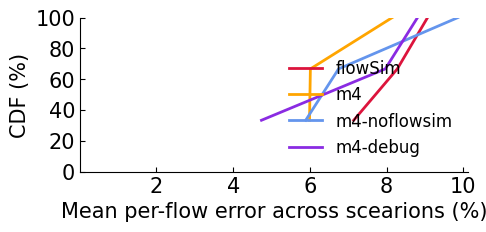

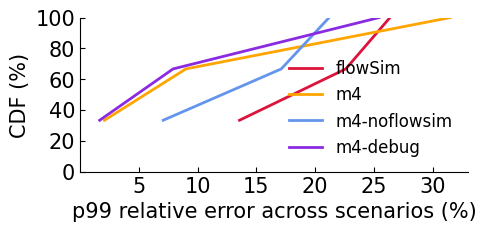

In [12]:
n_scenario=3
empirical_str = "eval_test"
# legend_list=['flowSim','m4','m4-12','m4-11']
# model_instance_list=['flowsim','final_10','final_noflowsim_12','final_noflowsim_11']
# legend_list=['flowSim','m4-12','m4-11','m4-10','m4-9','m4-8']
# model_instance_list=['flowsim','new_loss01_mlp1_nosize_12','new_loss01_mlp1_nosize_11','new_loss01_mlp1_nosize_10','new_loss01_mlp1_nosize_9','new_loss01_mlp1_nosize_8',]
# legend_list=['flowSim','m4-12','m4-11','m4-10','m4-9','m4-8','m4-7','m4-6','m4-5']
# model_instance_list=['flowsim','new_loss01_mlp1_noqueue_12','new_loss01_mlp1_noqueue_11','new_loss01_mlp1_noqueue_10','new_loss01_mlp1_noqueue_9','new_loss01_mlp1_noqueue_8','new_loss01_mlp1_noqueue_7','new_loss01_mlp1_noqueue_6','new_loss01_mlp1_noqueue_5']
# legend_list=['flowSim','m4-16','m4-15','m4-14','m4-13','m4-12','m4-11','m4-10','m4-9','m4-8','m4-7','m4-6']
# model_instance_list=['flowsim','new_loss01_mlp1_16','new_loss01_mlp1_15','new_loss01_mlp1_14','new_loss01_mlp1_13','new_loss01_mlp1_12','new_loss01_mlp1_11','new_loss01_mlp1_10','new_loss01_mlp1_9','new_loss01_mlp1_8','new_loss01_mlp1_7','new_loss01_mlp1_6']
# legend_list=['flowSim','m4-12','m4-11','m4-10','m4-9','m4-8','m4-7','m4-6','m4-5']
# model_instance_list=['flowsim','new_loss01_mlp1_noflowsim_12','new_loss01_mlp1_noflowsim_11','new_loss01_mlp1_noflowsim_10','new_loss01_mlp1_noflowsim_9','new_loss01_mlp1_noflowsim_8','new_loss01_mlp1_noflowsim_7','new_loss01_mlp1_noflowsim_6','new_loss01_mlp1_noflowsim_5']
# legend_list=['flowSim','m4-12','m4-11','m4-10','m4-9','m4-8','m4-7','m4-6','m4-5']

# model_instance_list=['flowsim','new_loss01_mlp1_10','new_debug_12','new_debug_11','new_debug_10','new_debug_9','new_debug_8','new_debug_7','new_debug_6','new_debug_5']
# legend_list=['flowSim','m4','m4-12','m4-11','m4-10','m4-9','m4-8','m4-7','m4-6','m4-5']

# model_instance_list=['flowsim','new_loss01_mlp1_10','new_debug_noflowsim_12','new_debug_noflowsim_11','new_debug_noflowsim_10','new_debug_noflowsim_9','new_debug_noflowsim_8','new_debug_noflowsim_7','new_debug_noflowsim_6','new_debug_noflowsim_5']
# legend_list=['flowSim','m4','m4-12','m4-11','m4-10','m4-9','m4-8','m4-7','m4-6','m4-5']

legend_list=['flowSim','m4','m4-noflowsim','m4-debug']
model_instance_list=['flowsim','new_loss01_mlp1_10','new_debug_noflowsim_10','new_debug_10']
                     
n_methods = len(legend_list)
config_file=f'/data1/lichenni/projects/per-flow-sim/parsimon-eval/expts/fig_8/spec/eval_test.mix.json'
configs=json.load(open(config_file))

index_list_ori=[]
for i in range(n_scenario):
    if os.path.exists(f'/data1/lichenni/projects/per-flow-sim/parsimon-eval/expts/fig_8/{empirical_str}/{i}/ns3/flowsim_fct.npy'):
        index_list_ori.append(i)
index_list=[]
config_list=[]
for idx,i in enumerate(index_list_ori):
    config=configs[i]
    spatial=config['spatial'].split('/')[-1].split('.')[0]
    size_dist=config['size_dist'].split('/')[-1].split('.')[0]
    cluster=config['cluster'].split('/')[-1].split('.')[0]
    max_load=float(config['max_load'])
    lognorm_sigma=float(config['lognorm_sigma'])
    cc=config['cc']
    bfsz=float(config['bfsz'])
    fwin=float(config['window'])
    
    config_list.append([spatial, size_dist, cluster, max_load, lognorm_sigma,cc,bfsz,fwin])
    index_list.append(idx)
config_list=np.array(config_list)

error_list=[]
error_list_p99=[]
for model_instance in model_instance_list:
    data_m4 = np.load(f'./res/{model_instance}{empirical_str}.npz')
    sldn = data_m4['fct']
    predicted_sldns = sldn[index_list, :, 0]
    actual_sldns = sldn[index_list,:, 1]
    print(f"{model_instance}-sldn: {predicted_sldns.shape}")
    
    predicted_sldns[predicted_sldns==0]=1
    actual_sldns[actual_sldns==0]=1
    # calculate the relative error
    relative_error_sldn = np.mean(np.abs(actual_sldns - predicted_sldns) / actual_sldns *100, axis=1)
    # relative_error_sldn = np.abs(actual_sldns - predicted_sldns) / actual_sldns *100
    sldn_p99_est=np.percentile(predicted_sldns,99,axis=1)
    sldn_p99_act=np.percentile(actual_sldns,99,axis=1)
    
    error_list.append(relative_error_sldn)
    error_list_p99.append(np.abs(sldn_p99_est-sldn_p99_act)/sldn_p99_act*100)
config_list=config_list[index_list]
error_list=np.array(error_list)
error_list_p99=np.array(error_list_p99)

# print(f"p99 error:{[np.percentile(x,99) for x in error_list]}")
print(f"mean error:{[np.mean(x) for x in error_list]}")
print(f"median error:{[np.median(x) for x in error_list]}")
print(f"p99 error:{[np.mean(x) for x in error_list_p99]}")

plot_cdf(
    error_list,
    None,
    legend_list,
    x_label="Mean per-flow error across scearions (%)",
    log_switch=False,
    rotate_xaxis=False,
    # ylim_low=90,
    # xlim=150,
    xlim_bottom=0.01,
    fontsize=15,
    legend_font=12,
    loc=4,
    enable_abs=True,
    group_size=5,
    fig_idx=0,
)

plot_cdf(
    error_list_p99,
    None,
    legend_list,
    x_label="p99 relative error across scenarios (%)",
    log_switch=False,
    rotate_xaxis=False,
    # ylim_low=90,
    # xlim=150,
    xlim_bottom=0.01,
    fontsize=15,
    legend_font=12,
    loc=4,
    enable_abs=True,
    group_size=5,
    fig_idx=1,
)

# Discretize the max_load values
max_load_values = np.array([config[3] for config in config_list], dtype=float)
bins = [0.3, 0.4,0.5, 0.6, 0.7, 0.8]
labels = ['0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8']
max_load_bins = np.digitize(max_load_values, bins, right=False) - 1
max_load_labels = [labels[i] for i in max_load_bins]
for idx, config in enumerate(config_list):
    config[3] = max_load_labels[idx]
    
bfsz_values = np.array([config[6] for config in config_list], dtype=float)
bins = [10,12,14,16,18,20]
labels = ['10-12', '12-14', '14-16', '16-18', '18-20']
bfsz_bins = np.digitize(bfsz_values, bins, right=False) - 1
bfz_labels = [labels[i] for i in bfsz_bins]
for idx, config in enumerate(config_list):
    config[6] = bfz_labels[idx]

fwin_values=np.array([config[7] for config in config_list], dtype=float)
bins = [10000,12000,14000,16000,18000,20000]
labels = ['10000-12000', '12000-14000', '14000-16000', '16000-18000', '18000-20000']
fwin_bins = np.digitize(fwin_values, bins, right=False) - 1
fwin_labels = [labels[i] for i in fwin_bins]
for idx, config in enumerate(config_list):
    config[7] = fwin_labels[idx]
# Convert config_list to a NumPy array for easier indexing
config_list = np.array(config_list)


# Function to plot box plots for each configuration type
# def plot_box_by_config(error_list, config_list, legend_list, config_index, config_name):
#     unique_configs = np.unique(config_list[:, config_index])
#     n_methods = len(legend_list)
    
#     # Prepare data for each unique configuration type
#     data_to_plot = {config_value: [[] for _ in range(n_methods)] for config_value in unique_configs}
#     for i, config_value in enumerate(config_list[:, config_index]):
#         for j in range(n_methods):
#             data_to_plot[config_value][j].append(error_list[i, j])
    
#     # Plot the data
#     plt.figure(figsize=(10, 6))
#     x_positions = np.arange(len(unique_configs))
#     box_width = 0.8 / n_methods  # Adjust width based on number of methods
#     colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightyellow']
#     handles = []
    
#     for j, method_label in enumerate(legend_list):
#         method_data = [data_to_plot[config_value][j] for config_value in unique_configs]
#         positions = x_positions - 0.4 + (j + 0.5) * box_width  # Center the boxes
#         bp = plt.boxplot(method_data, positions=positions, widths=box_width,
#                          patch_artist=True, 
#                          boxprops=dict(facecolor=colors[j % len(colors)], color=colors[j % len(colors)]),
#                          medianprops=dict(color="black"))
#         handles.append(bp["boxes"][0])

#     plt.title(f"Relative Error by {config_name} Configuration")
#     plt.xlabel(config_name)
#     plt.ylabel("Relative Error (%)")
#     plt.xticks(x_positions, unique_configs, rotation=45)
#     plt.legend(handles, legend_list)
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

# Generate plots for each configuration attribute
config_attributes = ["Spatial", "Size Distribution", "Cluster", "Max Load", "Lognorm Sigma", "CC", "BFSZ", "FWIN"]
for i, config_name in enumerate(config_attributes):
    plot_box_by_config(error_list.T, config_list, legend_list, config_index=i, config_name=config_name)

flowsim_large0-sldn: (85584,)
p99 slowdown: 2.70716249702616, 3.3371159918619004
m4_10_large0-sldn: (85584,)
p99 slowdown: 3.584040670394889, 3.3371159918619004
mean error:[19.796066156243874, 8.041182822247826]
p99 error: [18.87718306  7.3993436 ]


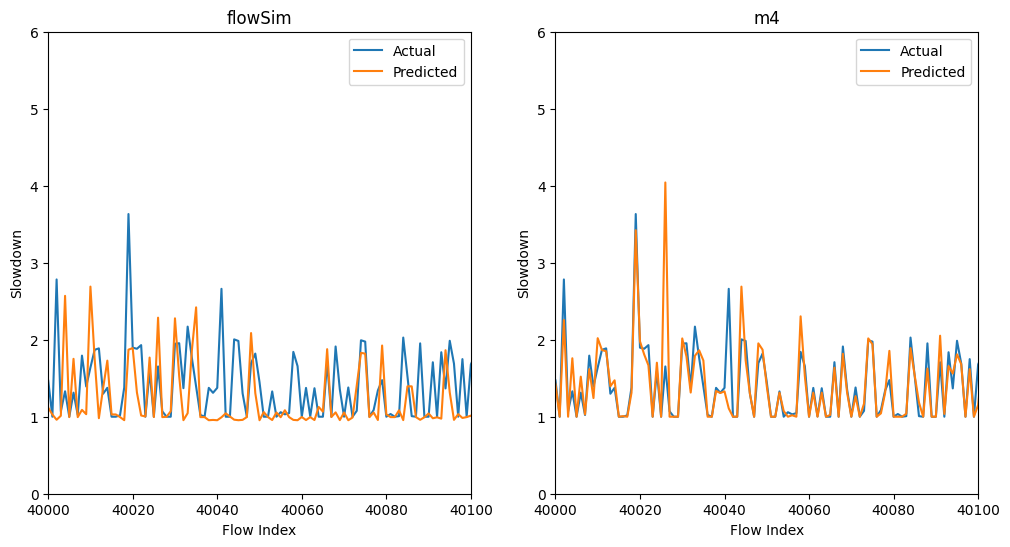

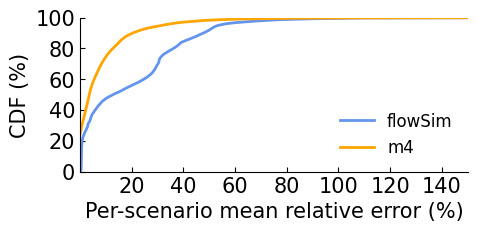

In [ ]:
empirical_str = ""
scenario_str="_large0"
# scenario_str=""
# legend_list=['flowSim','m4-flowsim-input','m4-final']
# model_instance_list=[f'flowsim{scenario_str}', f'topo_512_flowsim_input_dropout_19{scenario_str}',f'topo_reprod_19{scenario_str}']
# legend_list=['flowSim','m4','m4-data']
# model_instance_list=[f'flowsim{scenario_str}', f'topo_featrate_7{scenario_str}', f'topo_remainsize_large_data_7{scenario_str}']
# legend_list=['flowSim','m4-pre','m4']
# model_instance_list=[f'flowsim{scenario_str}', f'topo_featrate_7{scenario_str}',f'final_7{scenario_str}']
# legend_list=['flowSim','m4','m4-param']
# model_instance_list=[f'flowsim{scenario_str}',f'final_7{scenario_str}',f'final_param_6{scenario_str}']
# legend_list=['flowSim','m4','m4-GNN','m4-GNN-queue']
# model_instance_list=[f'flowsim{scenario_str}',f'final_param_6{scenario_str}',f"final_gnn_layer4_4{scenario_str}",f'm4_15{scenario_str}']
# legend_list=['flowSim','m4','m4-Queue','m4-noflowsim']
# model_instance_list=[f'flowsim{scenario_str}',f'final_param_6{scenario_str}',f'm4_15{scenario_str}',f"m4_noflowsim_9{scenario_str}"]
# legend_list=['flowSim','m4','m4-Queue','m4-16','m4-10']
# model_instance_list=[f'flowsim{scenario_str}',f'bm4_14{scenario_str}',f'bm4_15{scenario_str}',f"m4_16{scenario_str}",f"m4_10{scenario_str}"]
legend_list=['flowSim','m4']
model_instance_list=[f'flowsim{scenario_str}',f"m4_10{scenario_str}"]
                     
error_list=[]
error_list_p99=[]
sldn_list=[]
for model_instance in model_instance_list:
    data_m4 = np.load(f'./res/{model_instance}{empirical_str}.npz')
    sldn = data_m4['sldn']
    predicted_sldns = sldn[:, :, 0].squeeze()
    actual_sldns = sldn[:,:, 1].squeeze()
    print(f"{model_instance}-sldn: {predicted_sldns.shape}")
    
    predicted_sldns[predicted_sldns==0]=1
    actual_sldns[actual_sldns==0]=1
    # calculate the relative error
    relative_error_sldn = np.abs(actual_sldns - predicted_sldns) / actual_sldns *100
    sldn_list.append([actual_sldns,predicted_sldns])
    error_list.append(relative_error_sldn)
    
    sldn_p99_est=np.percentile(predicted_sldns,99)
    sldn_p99_act=np.percentile(actual_sldns,99)
    print(f"p99 slowdown: {sldn_p99_est}, {sldn_p99_act}")
    error_list_p99.append(np.abs(sldn_p99_est-sldn_p99_act)/sldn_p99_act*100)
error_list=np.array(error_list)
error_list_p99=np.array(error_list_p99)
sldn_list=np.array(sldn_list)
print(f"mean error:{[np.mean(x) for x in error_list]}")
print(f"p99 error: {error_list_p99}")
      
# Plotting
fig, axes = plt.subplots(1, len(model_instance_list), figsize=(12, 6))

# Plot each method in a subfigure
for i, (actual, predicted) in enumerate(sldn_list):
    axes[i].plot(actual, label="Actual")
    axes[i].plot(predicted, label="Predicted")
    axes[i].set_title(legend_list[i])
    axes[i].set_xlabel("Flow Index")
    axes[i].set_ylabel("Slowdown")
    axes[i].legend()
    axes[i].set_xlim(40000, 40100)
    axes[i].set_ylim(0, 6)
plot_cdf(
    error_list,
    None,
    legend_list,
    x_label="Per-scenario mean relative error (%)",
    log_switch=False,
    rotate_xaxis=False,
    # ylim_low=200,
    xlim=150,
    xlim_bottom=0.01,
    fontsize=15,
    legend_font=12,
    loc=4,
    enable_abs=True,
    group_size=5,
)

ns-3: 94
m4: 94
ns-3: 2907.9704255319148, m4: 241.19317416941865, flowsim: 56.40186381340027


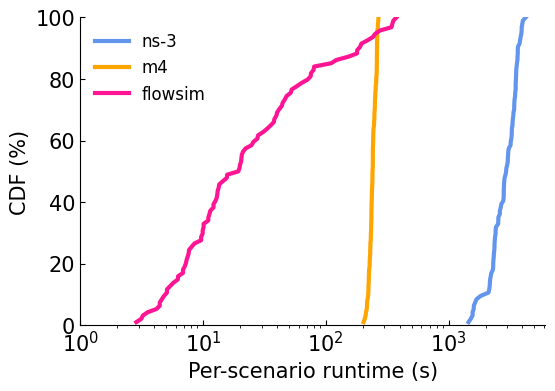

In [ ]:
import re
n_scenario=100
empirical_str='eval_test_8k'
data_root="/data1/lichenni/projects/per-flow-sim/parsimon-eval/expts/fig_8"
legend_list=['ns-3', 'm4', 'flowsim']
res=[]

time_ns3=[]
'''
for i in range(n_scenario):
    if os.path.exists(f'{data_root}/{empirical_str}/{i}/ns3/flowsim_fct.npy'):
        time_file=f'{data_root}/{empirical_str}/{i}/ns3/elapsed.txt'
        with open(time_file, "r") as file:
            number = float(file.read().strip())
            time_ns3.append(number)
res.append(time_ns3)     
print(f"ns-3: {len(time_ns3)}")  
'''

with open(f'{data_root}/{empirical_str}/ns3_times.txt') as f:
    time_ns3 = [float(txt.replace("\n", "")) for txt in f.readlines()]

print(f"ns-3: {len(time_ns3)}")  
res.append(time_ns3)

def read_log_file(file_path):
    try:
        with open(file_path, 'r') as file:
            log_text = file.read()
        return log_text
    except FileNotFoundError:
        print(f"Error: The file {file_path} was not found.")
        return None

def extract_scenario_times(log_text):
    # Regex patterns for time elapsed and workload scenario
    time_pattern = r"Time elapsed:\s([\d.]+)"

    # Extract times and workload IDs
    elapsed_times = re.findall(time_pattern, log_text)

    # Create a dictionary mapping scenario ID to time elapsed
    scenario_times = []
    for workload_idx, time in enumerate(elapsed_times):
        time=float(time)
        scenario_times.append(float(time))
    
    return scenario_times

log_text = read_log_file(f'{empirical_str}.log')
time_m4 = extract_scenario_times(log_text)
res.append(time_m4)
print(f"m4: {len(time_m4)}")

with open(f'{data_root}/{empirical_str}/flowsim_times.txt') as f:
    flowsim_times = [float(txt.replace("\n", "")) for txt in f.readlines()]

res.append(flowsim_times)

res=np.array(res)
print(f"ns-3: {np.mean(res[0])}, m4: {np.mean(res[1])}, flowsim: {np.mean(res[2])}")

fig_index=0
plot_cdf(
    res,
    None,
    legend_list,
    x_label="Per-scenario runtime (s)",
    log_switch=True,
    rotate_xaxis=False,
    # ylim_low=90,
    # xlim=150,
    xlim_bottom=1,
    fontsize=15,
    legend_font=12,
    loc=2,
    enable_abs=True,
    group_size=5,
    fig_idx=fig_index
)
fig_index=1